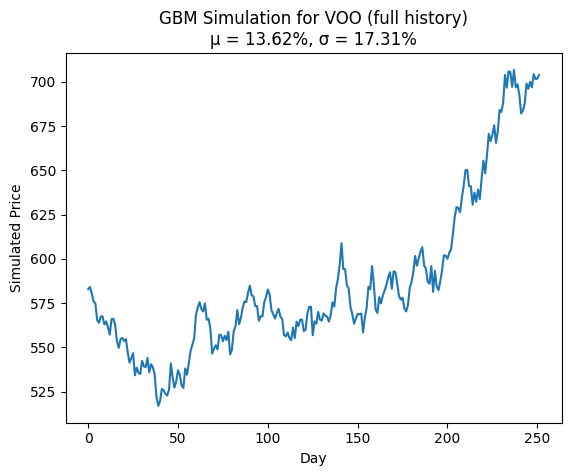

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

# fetch VOO’s entire trading history (using close prices)
ticker = yf.Ticker("VOO")
historical = ticker.history(period="max")  # from inception through today
prices = historical['Close']

# compute the daily logarithmic returns over the full history
log_returns = np.log(prices / prices.shift(1)).dropna()

# annualize the mean and volatility
trading_days = 252
mu = log_returns.mean() * trading_days  # expected annual return
sigma = log_returns.std() * np.sqrt(trading_days)   # annual volatility

# starting price for the simulation (the last close price)
S0 = prices.iloc[-1]

# formula parameters
T  = 1             # horizon: 1 year
N  = trading_days  # number of "steps" (≈ trading days)
dt = T / N         # time increment in years

# generate random shocks and volatility
Z = np.random.normal(size=N)    # drawing random numbers from a normal distribution
S = np.zeros(N)     # pre-allocate the array for the simulated prices
S[0] = S0   # set the starting price
for t in range(1, N):
    S[t] = S[t-1] * np.exp(
        (mu - 0.5 * sigma**2) * dt
        + sigma * np.sqrt(dt) * Z[t]
    )

# Plot the result
plt.plot(S)
plt.title(f"GBM Simulation for VOO (full history)\nμ = {mu:.2%}, σ = {sigma:.2%}")
plt.xlabel("Day")
plt.ylabel("Simulated Price")
plt.show()
